# Criando Grafo

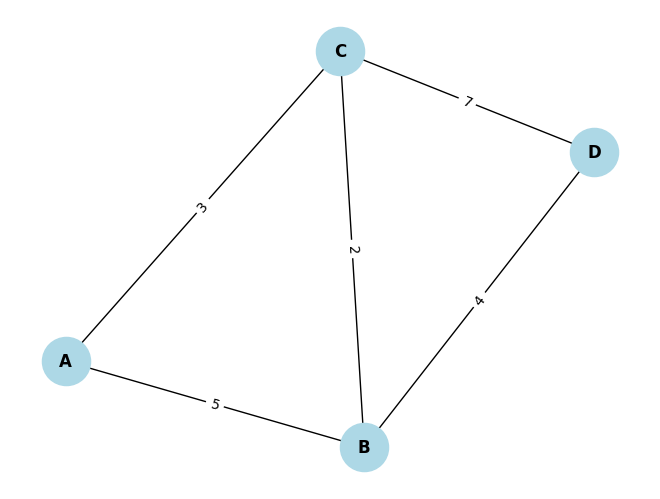

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo
G = nx.Graph()

# Adicionando nós (opcional, porque ao adicionar arestas eles já são criados)
G.add_nodes_from(["A", "B", "C", "D"])

# Adicionando arestas com pesos
# Sintaxe: (nó1, nó2, {"weight": valor})
G.add_edge("A", "B", weight=5)
G.add_edge("A", "C", weight=3)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "D", weight=7)
G.add_edge("B", "D", weight=4)

# Posição dos nós para visualização
pos = nx.spring_layout(G)

# Desenhar nós e arestas
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue", font_size=12, font_weight="bold")

# Extrair os pesos das arestas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


# Alg A* somente

In [ ]:
import networkx as nx

def criar_grafo_romenia():
    G = nx.Graph()

    edges = [
        ("Arad", "Zerind", 75),
        ("Arad", "Timisoara", 118),
        ("Arad", "Sibiu", 140),
        ("Zerind", "Oradea", 71),
        ("Oradea", "Sibiu", 151),
        ("Timisoara", "Lugoj", 111),
        ("Lugoj", "Mehadia", 70),
        ("Mehadia", "Drobeta", 75),
        ("Drobeta", "Craiova", 120),
        ("Craiova", "Rimnicu Vilcea", 146),
        ("Craiova", "Pitesti", 138),
        ("Rimnicu Vilcea", "Sibiu", 80),
        ("Rimnicu Vilcea", "Pitesti", 97),
        ("Sibiu", "Fagaras", 99),
        ("Fagaras", "Bucharest", 211),
        ("Pitesti", "Bucharest", 101),
        ("Bucharest", "Giurgiu", 90),
        ("Bucharest", "Urziceni", 85),
        ("Urziceni", "Hirsova", 98),
        ("Hirsova", "Eforie", 86),
        ("Urziceni", "Vaslui", 142),
        ("Vaslui", "Iasi", 92),
        ("Iasi", "Neamt", 87)
    ]

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    return G


# Distâncias em linha reta até Bucareste (heurística clássica)
heuristicas = {
    "Arad": 366,
    "Bucharest": 0,
    "Craiova": 160,
    "Drobeta": 242,
    "Eforie": 161,
    "Fagaras": 176,
    "Giurgiu": 77,
    "Hirsova": 151,
    "Iasi": 226,
    "Lugoj": 244,
    "Mehadia": 241,
    "Neamt": 234,
    "Oradea": 380,
    "Pitesti": 100,
    "Rimnicu Vilcea": 193,
    "Sibiu": 253,
    "Timisoara": 329,
    "Urziceni": 80,
    "Vaslui": 199,
    "Zerind": 374
}

def h(n1, n2):
    """Heurística: distância estimada até o destino (se existir)"""
    return heuristicas.get(n1, 0)


def caminho_minimo(inicio, fim):
    G = criar_grafo_romenia()
    
    try:
        caminho = nx.astar_path(G, inicio, fim, heuristic=lambda u, v: h(u, fim), weight="weight")
        distancia = nx.astar_path_length(G, inicio, fim, heuristic=lambda u, v: h(u, fim), weight="weight")
        
        print(f"Caminho de {inicio} até {fim}: {' -> '.join(caminho)}")
        print(f"Distância total: {distancia} km")
    except nx.NetworkXNoPath:
        print(f"Não existe caminho entre {inicio} e {fim}")
    except nx.NodeNotFound:
        print("Cidade inválida! Verifique o nome digitado.")


if __name__ == "__main__":
    inicio = input("Digite a cidade inicial: ")
    fim = input("Digite a cidade final: ")
    caminho_minimo(inicio, fim)


Caminho de Arad até Bucharest: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Distância total: 418 km


Caminho de Arad até Bucharest: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Distância total: 418 km


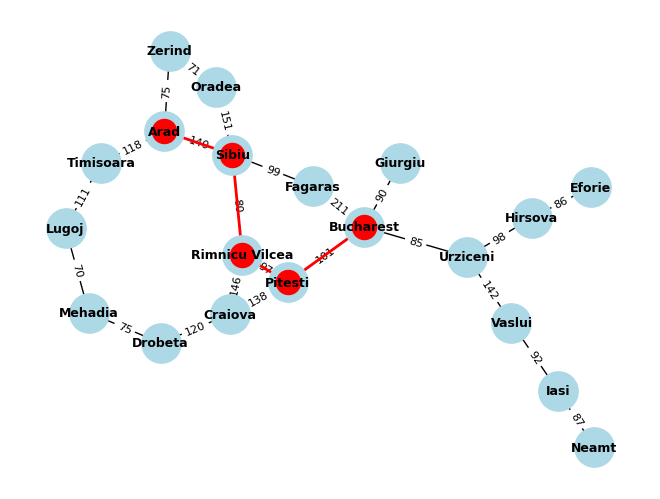

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def criar_grafo_romenia():
    G = nx.Graph()

    edges = [
        ("Arad", "Zerind", 75),
        ("Arad", "Timisoara", 118),
        ("Arad", "Sibiu", 140),
        ("Zerind", "Oradea", 71),
        ("Oradea", "Sibiu", 151),
        ("Timisoara", "Lugoj", 111),
        ("Lugoj", "Mehadia", 70),
        ("Mehadia", "Drobeta", 75),
        ("Drobeta", "Craiova", 120),
        ("Craiova", "Rimnicu Vilcea", 146),
        ("Craiova", "Pitesti", 138),
        ("Rimnicu Vilcea", "Sibiu", 80),
        ("Rimnicu Vilcea", "Pitesti", 97),
        ("Sibiu", "Fagaras", 99),
        ("Fagaras", "Bucharest", 211),
        ("Pitesti", "Bucharest", 101),
        ("Bucharest", "Giurgiu", 90),
        ("Bucharest", "Urziceni", 85),
        ("Urziceni", "Hirsova", 98),
        ("Hirsova", "Eforie", 86),
        ("Urziceni", "Vaslui", 142),
        ("Vaslui", "Iasi", 92),
        ("Iasi", "Neamt", 87)
    ]

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    return G

# Heurística: distâncias em linha reta até Bucareste
heuristicas = {
    "Arad": 366,
    "Bucharest": 0,
    "Craiova": 160,
    "Drobeta": 242,
    "Eforie": 161,
    "Fagaras": 176,
    "Giurgiu": 77,
    "Hirsova": 151,
    "Iasi": 226,
    "Lugoj": 244,
    "Mehadia": 241,
    "Neamt": 234,
    "Oradea": 380,
    "Pitesti": 100,
    "Rimnicu Vilcea": 193,
    "Sibiu": 253,
    "Timisoara": 329,
    "Urziceni": 80,
    "Vaslui": 199,
    "Zerind": 374
}

def h(n1, n2):
    """Função heurística (retorna a distância em linha reta até o destino, se existir)"""
    return heuristicas.get(n1, 0)

def mostrar_caminho(inicio, fim):
    G = criar_grafo_romenia()

    # calcula caminho mais curto com A*
    caminho = nx.astar_path(G, inicio, fim, heuristic=lambda u, v: h(u, fim), weight="weight")
    distancia = nx.astar_path_length(G, inicio, fim, heuristic=lambda u, v: h(u, fim), weight="weight")

    print(f"Caminho de {inicio} até {fim}: {' -> '.join(caminho)}")
    print(f"Distância total: {distancia} km")

    # layout para posicionar os nós
    pos = nx.spring_layout(G, seed=42)  

    # desenha o grafo completo
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=9, font_weight="bold")
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

    # destaca o caminho encontrado em vermelho
    caminho_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=caminho_edges, edge_color="red", width=2)

    plt.show()


if __name__ == "__main__":
    inicio = input("Digite a cidade inicial: ")
    fim = input("Digite a cidade final: ")
    mostrar_caminho(inicio, fim)


In [2]:
from pyamaze import maze

labirinto = maze(4,4)
labirinto.CreateMaze()
labirinto.run()